# 分類の予測モデル作成

In [3]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭5行を表示
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [4]:
# Inputを学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## 決定木 (Decision Tree)

In [5]:
from sklearn.tree import DecisionTreeClassifier
# 決定木をインスタンス化する (気の最大の深さ3)
tree = DecisionTreeClassifier(max_depth=3)
# 学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1,
       2])

## ランダムフォレスト

In [7]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators=100)
# 学習
forest.fit(X_train, y_train)
# 予測
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1,
       2])

## サポートベクターマシン

In [8]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Irisデータセットの読み込み
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]

# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# SVMのインスタンス化
svc = SVC(gamma='scale')

# SVMで学習
svc.fit(X_train, y_train)

# テストデータセットの予測
y_pred = svc.predict(X_test)

## 予測結果の精度を評価

In [11]:
from sklearn.metrics import classification_report
# 適合率、再現率、F値を出力
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 交差検証 (クロスバリデーション)

In [13]:
# 交差検証 = クロスバリデーション
# モデルの構築と評価を複数回実行する
from sklearn.model_selection import cross_val_score
# 10分割の交差検証を実行
svc = SVC(gamma='scale')
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 予測確率の正確さ

In [2]:
# ROC曲線で正確さを確かめる
# データを取り込む
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2f096557af5b49e48e4fe6586d2aa704 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='API_KEY_ID',
    ibm_auth_endpoint="AUTH_ENDPOINT",
    config=Config(signature_version='oauth'),
    endpoint_url='ENDPOINT_URL')

body = client_2f096557af5b49e48e4fe6586d2aa704.get_object(Bucket='BUCKET',Key='OBJECT_KEY')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_unsubscriber = pd.read_csv(body)


,予測退会確率,退会実績
0,0.98,退会した
1,0.95,退会した
2,0.90,退会しなかった
3,0.87,退会した
4,0.85,退会しなかった


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# 退会実績をタミー変数化
le = LabelEncoder()
labels = le.fit(df_unsubscriber['退会実績'])
le.classes_ = ['退会しなかった', '退会した']  # 退会しなかった: 0, 退会した:1とするためにラベルを明示的につける
labels = le.transform(df_unsubscriber['退会実績'])
probs = df_unsubscriber['予測退会確率'].values

# 偽陽性率、真陽性率、閾値を算出
fpr, tpr, threshold = roc_curve(labels, probs)  # 0: false, 1: trueとなるのでラベルが逆だと混乱する...
print('偽陽性率: ', fpr)
print('真陽性率: ', tpr)

偽陽性率:  [0.         0.         0.         0.07692308 0.07692308 0.23076923
 0.23076923 0.38461538 0.38461538 0.53846154 0.53846154 0.69230769
 0.69230769 0.84615385 0.84615385 1.        ]
真陽性率:  [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


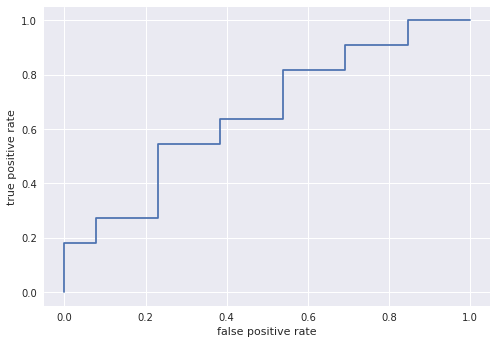

In [21]:
# ROC曲線をプロット
import matplotlib.pyplot as plt
import matplotlib.style

matplotlib.style.use('seaborn')

fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [22]:
# AUC (ROCの線下の面積)を算出
# 1.0に近いほど予測値が実測値と合致している。0.5に近いほど外れている。
from sklearn.metrics import roc_auc_score
roc_auc_score(labels, probs)

0.6573426573426574